# Aim
The purpose of this project is to develop a machine learning model that predicts the future closing prices of Apple Inc. (AAPL) stock based on historical market data. By leveraging quantitative analysis and predictive modeling techniques, the project aims to assist investors, traders, and financial analysts in making informed decisions about potential future price movements. The model incorporates features such as daily returns, moving averages, and other technical indicators to capture market trends and patterns. Through this exploration, I aim to gain insights into the dynamics of AAPL stock and demonstrate the application of machine learning in the financial domain.

# Downloading Historical Stock Data
We use the yfinance library to interact with the Yahoo Finance API and download historical stock data. The ticker variable is set to "AAPL" to specify that we want Apple Inc.'s stock data. start_date and end_date are chosen to set the time range for which we want historical data. The yf.download() function fetches the data and stores it in the stock_data variable. The data is then saved to a CSV file ("aapl_stock_data.csv") for later use.


In [ ]:
# Using yfinance library to get historical stock data from yahoo finance
!pip install yfinance

In [ ]:
import yfinance as yf

# Download historical data for Apple Inc. (AAPL)
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2024-01-24"
stock_data = yf.download(ticker,start=start_date,end=end_date)

# Save the data to a CSV file
stock_data.to_csv("appl_stock_data.csv")

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


# Data Preprocessing

We use the pd.read_csv() function to load the data from the CSV file into a Pandas DataFrame.
The 'Date' column is converted to a datetime format using pd.to_datetime() for consistency.
The data is sorted chronologically based on the 'Date' column.
The info() function is used to check for any missing values or anomalies in the dataset.

In [ ]:
import pandas as pd

# Load the data from the CSV file
stock_data = pd.read_csv("/content/appl_stock_data.csv")

# Display a random sample of 5 rows from the DataFrame
random_sample = stock_data.sample(5)

# Print the random sample
print(random_sample)

           Date        Open        High         Low       Close   Adj Close  \
433  2023-09-25  174.199997  176.970001  174.149994  176.080002  175.848328   
150  2022-08-09  164.020004  165.820007  163.250000  164.919998  163.731705   
408  2023-08-18  172.300003  175.100006  171.960007  174.490005  174.260422   
45   2022-03-09  161.479996  163.410004  159.410004  162.949997  161.314468   
235  2022-12-08  142.360001  143.520004  141.100006  142.649994  141.857086   

       Volume  
433  46172700  
150  63135500  
408  61114200  
45   91454900  
235  62128300  


In [ ]:
# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
511,2024-01-17,181.270004,182.929993,180.300003,182.679993,182.679993,47317400
512,2024-01-18,186.089996,189.139999,185.830002,188.630005,188.630005,78005800
513,2024-01-19,189.330002,191.949997,188.820007,191.559998,191.559998,68741000
514,2024-01-22,192.300003,195.330002,192.259995,193.889999,193.889999,60133900
515,2024-01-23,195.020004,195.750000,193.830002,195.179993,195.179993,42355600


In [ ]:
# Sort the data chronologically
stock_data = stock_data.sort_values(by='Date')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100


In [ ]:
# Check for anomalies or missing values
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       516 non-null    datetime64[ns]
 1   Open       516 non-null    float64       
 2   High       516 non-null    float64       
 3   Low        516 non-null    float64       
 4   Close      516 non-null    float64       
 5   Adj Close  516 non-null    float64       
 6   Volume     516 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 32.2 KB
None


# Exploring Stock Data

# Visualizing Closing Prices Over Time:

Use line plots or time series plots to visualize how the closing prices of AAPL stock have changed over time. This can help identify overall trends or seasonality.

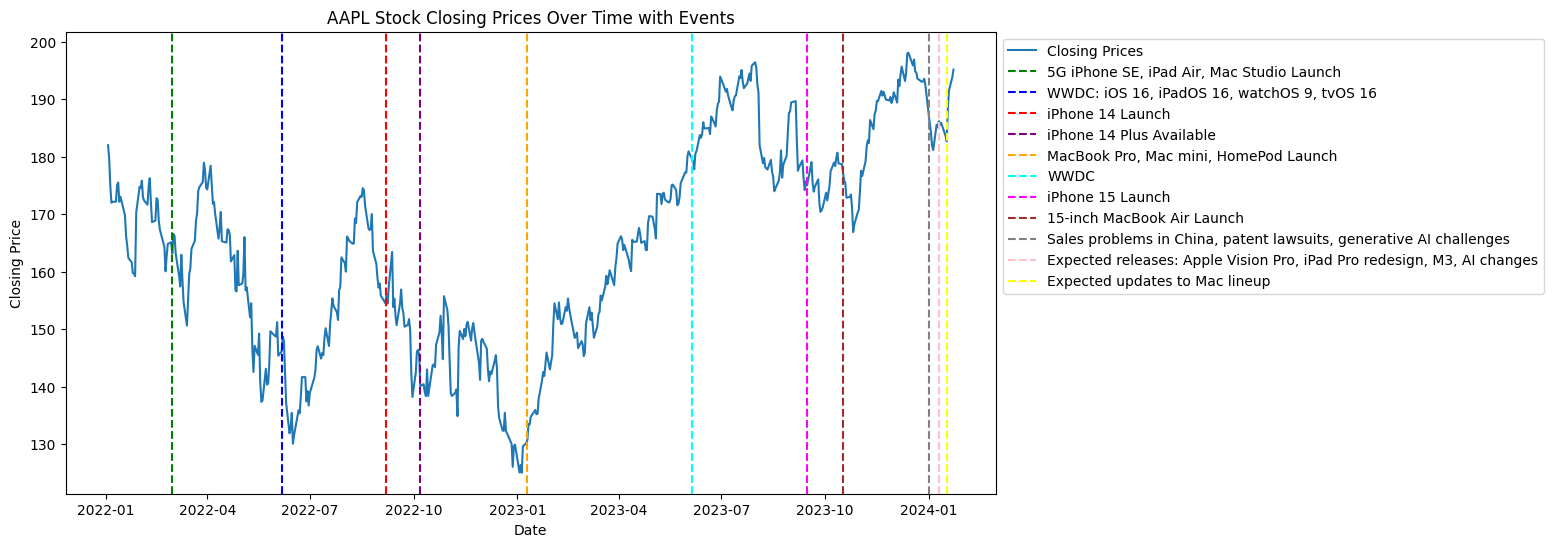

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Convert the 'Date' column in stock_data to datetime objects
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Prices')

# Important events in 2022
events_2022 = [
    {'date': '2022-03-01', 'label': '5G iPhone SE, iPad Air, Mac Studio Launch', 'color': 'g'},
    {'date': '2022-06-06', 'label': 'WWDC: iOS 16, iPadOS 16, watchOS 9, tvOS 16', 'color': 'b'},
    {'date': '2022-09-07', 'label': 'iPhone 14 Launch', 'color': 'r'},
    {'date': '2022-10-07', 'label': 'iPhone 14 Plus Available', 'color': 'purple'}
]

# Important events in 2023
events_2023 = [
    {'date': '2023-01-10', 'label': 'MacBook Pro, Mac mini, HomePod Launch', 'color': 'orange'},
    {'date': '2023-06-05', 'label': 'WWDC', 'color': 'cyan'},
    {'date': '2023-09-15', 'label': 'iPhone 15 Launch', 'color': 'magenta'},
    {'date': '2023-10-17', 'label': '15-inch MacBook Air Launch', 'color': 'brown'}
]

# Important expectations for 2024
expectations_2024 = [
    {'date': '2024-01-01', 'label': 'Sales problems in China, patent lawsuits, generative AI challenges', 'color': 'gray'},
    {'date': '2024-01-10', 'label': 'Expected releases: Apple Vision Pro, iPad Pro redesign, M3, AI changes', 'color': 'pink'},
    {'date': '2024-01-17', 'label': 'Expected updates to Mac lineup', 'color': 'yellow'}
]

# Convert event dates to datetime objects
for event_list in [events_2022, events_2023, expectations_2024]:
    for event in event_list:
        event['date'] = datetime.strptime(event['date'], '%Y-%m-%d')

    # Marking the events as vertical lines
    for event in event_list:
        plt.axvline(x=event['date'], linestyle='--', color=event['color'], label=event['label'])

plt.title('AAPL Stock Closing Prices Over Time with Events')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position
plt.show()


  Important dates for apple in 2022:
* March 1, 2022: Apple launched the 5G iPhone SE, 5G iPad Air, Mac Studio, and
Studio Display
* June 6, 2022: Apple held its Worldwide Developers Conference (WWDC) and introduced iOS 16, iPadOS 16, watchOS 9, and tvOS 16
* September 7, 2022: Apple launched the iPhone 14
* October 7, 2022: The 6.7-inch iPhone 14 Plus became available for purchase


Important dates for apple in 2023:
* January 10, 2023: Apple launched the 14 and 16-inch M2 Pro/Max MacBook Pro, M2 and M2 Pro Mac mini, and HomePod.
* June 5, 2023: Apple held its Worldwide Developers Conference (WWDC).
* September 15, 2023: Apple launched the iPhone 15.
* October 17, 2023: Apple launched the 15-inch MacBook Air.

Expectation for apple in 2024:
However, according to a recent article by CNN Business, Apple is facing several challenges this year, including sales problems in China, patent lawsuits in the US, and being behind in generative AI. Additionally, AppleInsider reports that Apple is expected to release the Apple Vision Pro, iPad Pro redesign, M3, and AI changes in 2024. MacRumors also reports that substantial updates to the Mac lineup will launch starting later this year or in early 2024, encompassing new 14- and 16-inch MacBook Pro models with the M3 Pro and M3 Max chips, a refreshed 13-inch MacBook Pro with the M3 chip, two new MacBook Air models, and new 24-inch iMac models.

# Histogram of Daily Returns

This graph can help us understand the volatility of the stock. Volatility of a stock reflects the extent to which the price of stock fluctuates.

Daily return is a measure of the daily percentage change in the closing price if a stock. Mathematically, is is calculated as follows:

Daily return = (Closing price at time t - Closing price at time t-1)/Closing price at t-1


Frequency in this context means the number of days the stock daily return was between that range of bin.

In [ ]:
# Add the daily_return column
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Display the first few rows of the updated DataFrame
print(stock_data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
1 2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669983   
2 2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
3 2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056946   
4 2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

      Volume  Daily_Return  
0  104487900           NaN  
1   99310400     -0.012692  
2   94537600     -0.026600  
3   96904000     -0.016693  
4   86709100      0.000988  


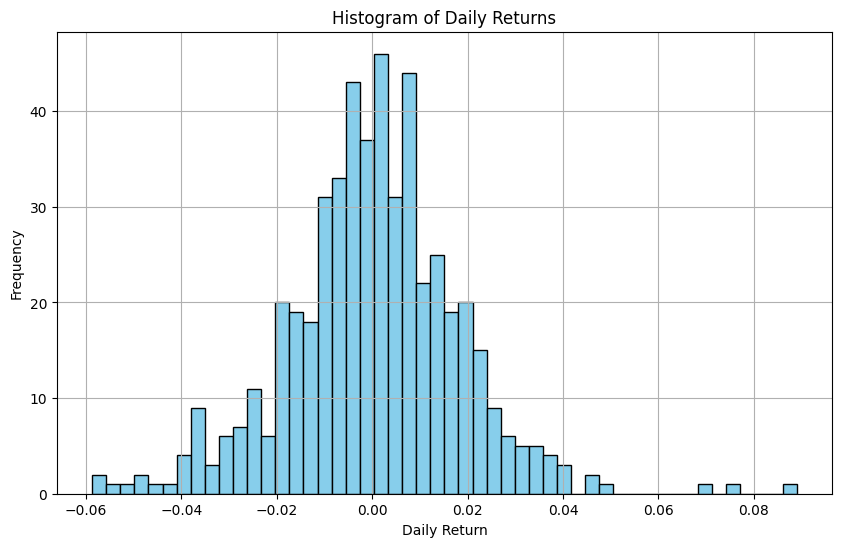

In [ ]:
# Plotting histogram of daily returns
plt.figure(figsize=(10, 6))
stock_data['Daily_Return'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

  From this visualization it is evident that apple stock has lower volatility as the daily return is fairly within the range of -0.02 to 0.02. It is a good sign for long-term investors as it is stable, predictable and less risky.

# Scatter Plot with 7-Day Moving Average



In [ ]:
# Computing moving averages can smooth out fluctuations and capture trends
stock_data['7_Day_MA'] = stock_data['Close'].rolling(window=7).mean()
stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,7_Day_MA
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,NaN,NaN
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,-0.012692,NaN
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,-0.026600,NaN
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000,-0.016693,NaN
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,0.000988,NaN
5,2022-01-10,169.080002,172.500000,168.169998,172.190002,170.244827,106765600,0.000116,NaN
6,2022-01-11,172.320007,175.179993,170.820007,175.080002,173.102203,76138300,0.016784,175.438570
7,2022-01-12,176.119995,177.179993,174.820007,175.529999,173.547104,74805200,0.002570,174.512857
8,2022-01-13,175.779999,176.619995,171.789993,172.190002,170.244827,84505800,-0.019028,173.440000
9,2022-01-14,171.339996,173.779999,171.089996,173.070007,171.114883,80440800,0.005111,173.175716


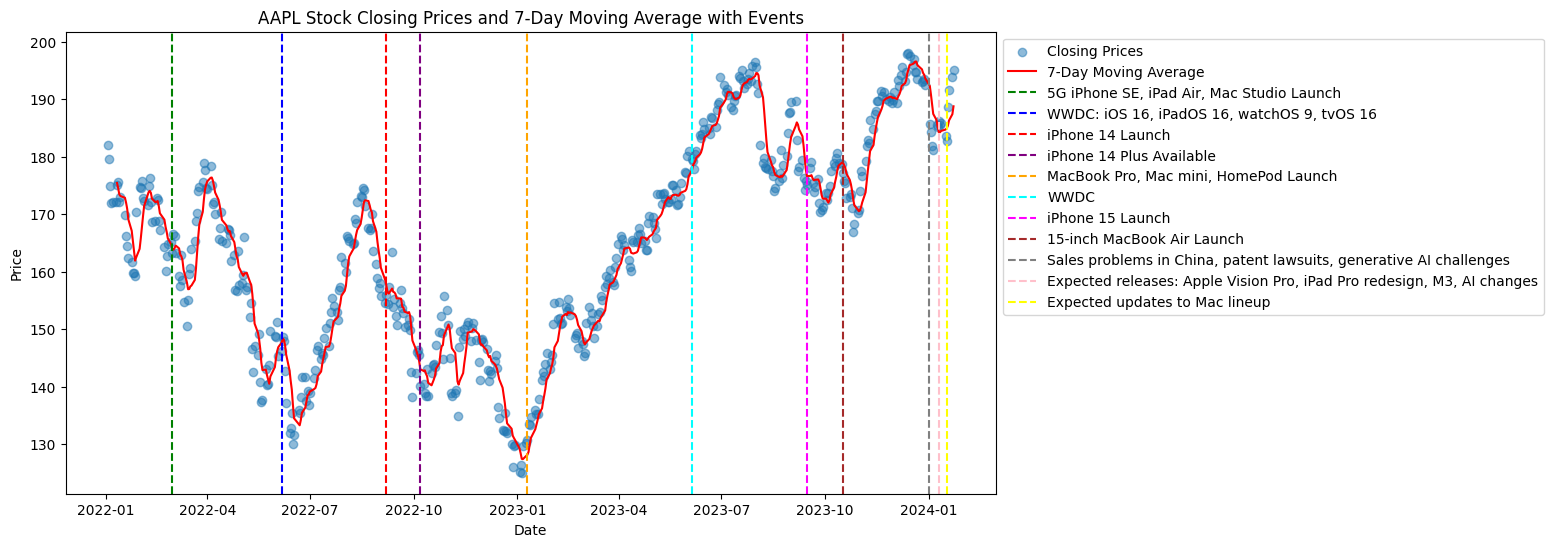

In [ ]:
# Scatter plot with 7-day moving average
plt.figure(figsize=(12, 6))
plt.scatter(stock_data['Date'], stock_data['Close'], label='Closing Prices', alpha=0.5)
plt.plot(stock_data['Date'], stock_data['7_Day_MA'], color='red', label='7-Day Moving Average')

# Marking the events as vertical lines
for event in events_2022 + events_2023 + expectations_2024:
    plt.axvline(x=event['date'], linestyle='--', color=event['color'], label=event['label'])

plt.title('AAPL Stock Closing Prices and 7-Day Moving Average with Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Relative Strength Index (RSI)

RSI, or the Relative Strength Index, is a momentum oscillator that measures the speed and change of price movements in a financial market. It is a popular technical indicator used by traders and analysts to identify overbought or oversold conditions in an asset and to assess the strength and potential direction of price trends.

RSI is typically calculated using the following formula:

RSI = 100 - (100/(1+RS))

where RS (Relative Strength) is the average gain divided by the average loss over a specified period.

The default period for RSI calculation is 14, meaning it considers the average gain and loss over the past 14 periods (days, weeks, etc.).Traders may adjust the timeframe based on their trading style and preferences.


## Interpretation of RSI:

**Overbought and Oversold Levels:**

RSI values range from 0 to 100. Traditionally, an RSI above 70 is considered overbought, suggesting that the asset may be due for a price correction or pullback. Conversely, an RSI below 30 is considered oversold, indicating that the asset may be undervalued, and a rebound or reversal could be imminent.

**Trend Confirmation:**

RSI can be used to confirm the strength of a trend. If the RSI is rising along with an uptrend in prices, it suggests that the trend is strong. Similarly, if the RSI is falling along with a downtrend, it indicates strong bearish momentum.

**Divergence:**

Divergence between RSI and price movements can provide valuable signals. For example, if the price is making new highs, but RSI is not confirming those highs (divergence), it may signal weakening momentum and a potential reversal.

**Centerline Crossovers:**

The RSI line also has a centerline at 50. Crosses above 50 may indicate bullish momentum, while crosses below 50 may suggest bearish momentum.

# Significance of RSI:

**Identifying Overbought and Oversold Conditions:**

RSI helps traders identify when an asset may be overextended in one direction, providing an opportunity for a potential reversal.
Overbought and oversold conditions are not signals on their own but are used in conjunction with other technical and fundamental analysis.

**Trend Confirmation:**

RSI can help traders confirm the strength of an existing trend, aiding in trend-following strategies.

**Divergence Signals:**

Divergence between RSI and price movements can serve as an early warning sign of potential reversals or trend weaknesses.

**Dynamic Indicator:**

RSI is a dynamic indicator that adapts to recent price changes. This makes it responsive to short-term market movements.

**Risk Management:**

Traders use RSI as part of their risk management strategy, helping them make informed decisions about entering or exiting trades.

While RSI can be a valuable tool in technical analysis, it is important to use it in conjunction with other indicators and analysis methods. No single indicator provides foolproof signals, and market conditions can vary. Traders should consider the broader context of the market and use RSI as one component of their analytical toolkit.

In [ ]:
def calculate_rsi(data, column_name, period=14):
    close_prices = data['Close']
    delta = close_prices.diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    data[column_name] = rsi

calculate_rsi(stock_data, 'RSI')

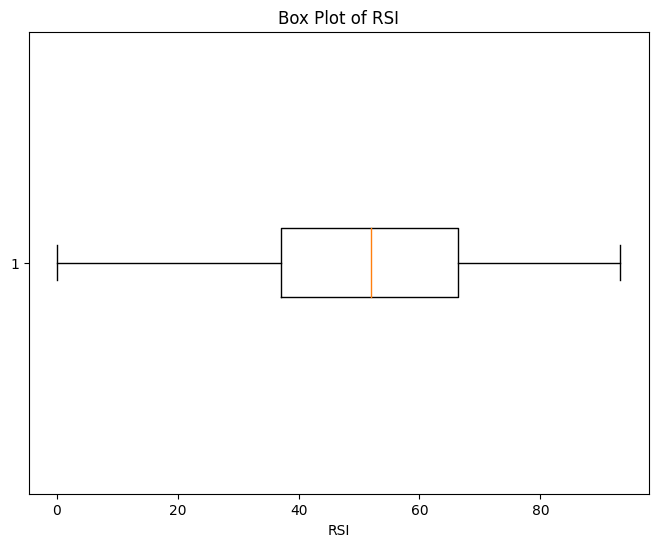

In [ ]:
# Box plot of RSI
plt.figure(figsize=(8, 6))
plt.boxplot(stock_data['RSI'].dropna(), vert=False)
plt.title('Box Plot of RSI')
plt.xlabel('RSI')
plt.show()

The median value of around 50 indicates that, on average, the RSI tends to be close to a neutral level. An RSI value of 50 is often considered a point of balance, suggesting neither overbought nor oversold conditions.

**RSI Overbought/Oversold Zones:**
Overlay horizontal lines on the RSI chart to visually represent overbought (70) and oversold (30) levels.

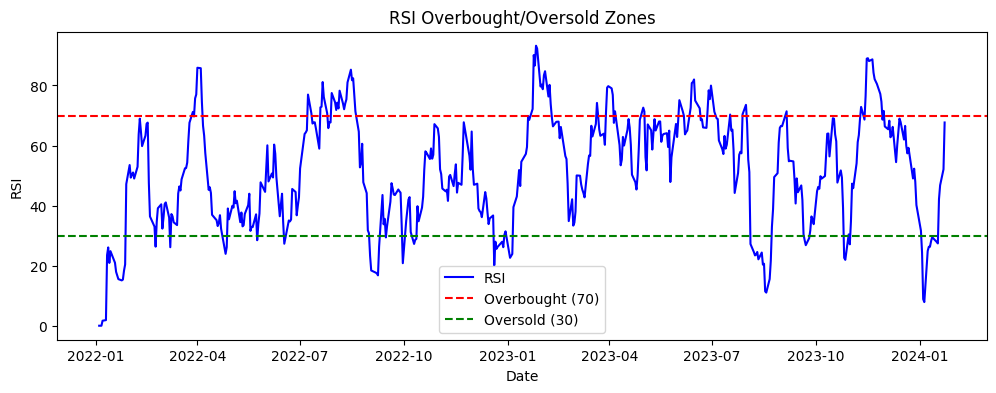

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('RSI Overbought/Oversold Zones')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

**Divergence Analysis:**
Plotting RSI alongside price movements and using annotations or arrows to mark potential divergence points.

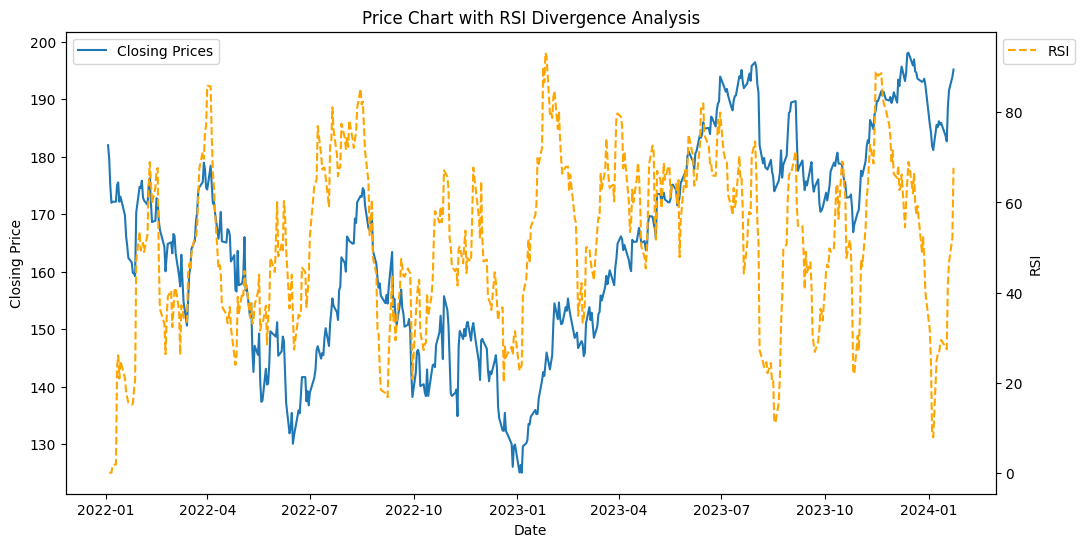

In [ ]:
# Calculate 7-day and 14-day moving averages for both price and RSI
stock_data['Close_MA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['RSI_MA_7'] = stock_data['RSI'].rolling(window=7).mean()

stock_data['Close_MA_14'] = stock_data['Close'].rolling(window=14).mean()
stock_data['RSI_MA_14'] = stock_data['RSI'].rolling(window=14).mean()

# Identify divergence points
divergence_points = []

for i in range(1, len(stock_data)):
    if (
        (stock_data['Close_MA_7'][i] > stock_data['Close_MA_14'][i]) and
        (stock_data['RSI_MA_7'][i] < stock_data['RSI_MA_14'][i])
    ):
        divergence_points.append({'date': stock_data['Date'][i], 'price': stock_data['Close'][i]})

# Visualize the chart with divergence points
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Prices')
plt.title('Price Chart with RSI Divergence Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.twinx()  # Create a secondary y-axis for RSI
plt.plot(stock_data['Date'], stock_data['RSI'], color='orange', label='RSI', linestyle='--')

# Mark divergence points with arrows
for divergence_point in divergence_points:
    plt.annotate('Divergence', xy=(divergence_point['date'], divergence_point['price']),
                 xytext=(divergence_point['date'], divergence_point['price'] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.ylabel('RSI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**RSI as a Signal for Buy/Sell Decisions:**
Use RSI crossovers with certain levels as signals for buy or sell decisions.

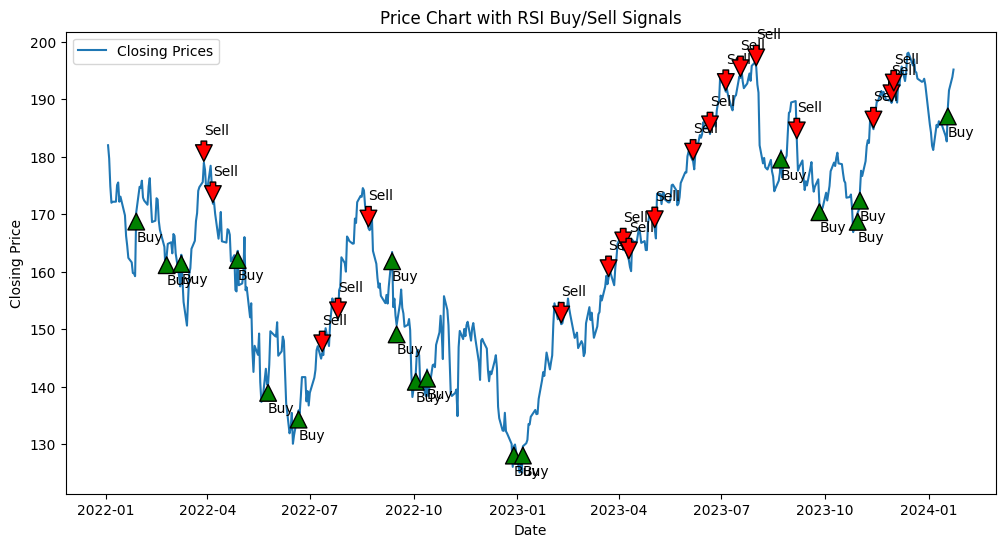

In [ ]:
# Set threshold values for buy and sell signals
buy_threshold = 30
sell_threshold = 70

# Initialize lists to store buy and sell signals
buy_signals = []
sell_signals = []

# Identify buy and sell signals
for i in range(1, len(stock_data)):
    if stock_data['RSI'][i - 1] <= buy_threshold and stock_data['RSI'][i] > buy_threshold:
        buy_signals.append({'date': stock_data['Date'][i], 'price': stock_data['Close'][i]})
    elif stock_data['RSI'][i - 1] >= sell_threshold and stock_data['RSI'][i] < sell_threshold:
        sell_signals.append({'date': stock_data['Date'][i], 'price': stock_data['Close'][i]})

# Visualize the chart with buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Prices')
plt.title('Price Chart with RSI Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Mark buy signals with green arrows
for buy_signal in buy_signals:
    plt.annotate('Buy', xy=(buy_signal['date'], buy_signal['price']),
                 xytext=(buy_signal['date'], buy_signal['price'] - 5),
                 arrowprops=dict(facecolor='green', shrink=0.05))

# Mark sell signals with red arrows
for sell_signal in sell_signals:
    plt.annotate('Sell', xy=(sell_signal['date'], sell_signal['price']),
                 xytext=(sell_signal['date'], sell_signal['price'] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

# Bollinger Bands

Bollinger Bands are a technical analysis tool that helps traders assess the volatility and potential price reversals of a financial instrument. They consist of three bands: a middle band being an N-period simple moving average (SMA), an upper band at K times an N-period standard deviation above the middle band, and a lower band at K times an N-period standard deviation below the middle band.

**Components of Bollinger Bands:**
* **Middle Band (SMA):**The middle band is typically a simple moving average (SMA) of the closing prices over a specified period (N).
The choice of the period for the SMA depends on the trader's preferences and the timeframe of analysis.
* **Upper Band and Lower Band:**The upper band is calculated by adding K times the N-period standard deviation to the middle band.
The lower band is calculated by subtracting K times the N-period standard deviation from the middle band.
The value of K is a parameter that determines the width of the bands. Common values for K are 2.

**Interpretation of Bollinger Bands:**
* **Volatility Assessment:** Bollinger Bands expand and contract based on the volatility of the underlying asset. In periods of high volatility, the bands widen, and in periods of low volatility, the bands contract.
* **Overbought and Oversold Conditions:** Bollinger Bands are often used to identify overbought and oversold conditions. If the price is near or touching the upper band, it may be considered overbought, suggesting a potential reversal or pullback. Conversely, if the price is near or touching the lower band, it may be considered oversold, indicating a potential upward reversal.
* **Trend Confirmation:** Bollinger Bands can help confirm the strength and direction of a trend. If the price consistently rides the upper band, it may indicate a strong uptrend. If it rides the lower band, it may indicate a strong downtrend.
* **Reversal Signals:** Reversal signals can be generated when the price moves beyond one of the bands and then reverts back inside. For example, if the price touches or exceeds the upper band and then falls back inside, it may signal a potential reversal to the downside.

In [ ]:
def calculate_bollinger_bands(data, column_name, window=20, num_std=2):
    data['Middle_Band'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['Middle_Band'] + (data['Close'].rolling(window=window).std() * num_std)
    data['Lower_Band'] = data['Middle_Band'] - (data['Close'].rolling(window=window).std() * num_std)

calculate_bollinger_bands(stock_data, 'Bollinger_Bands')

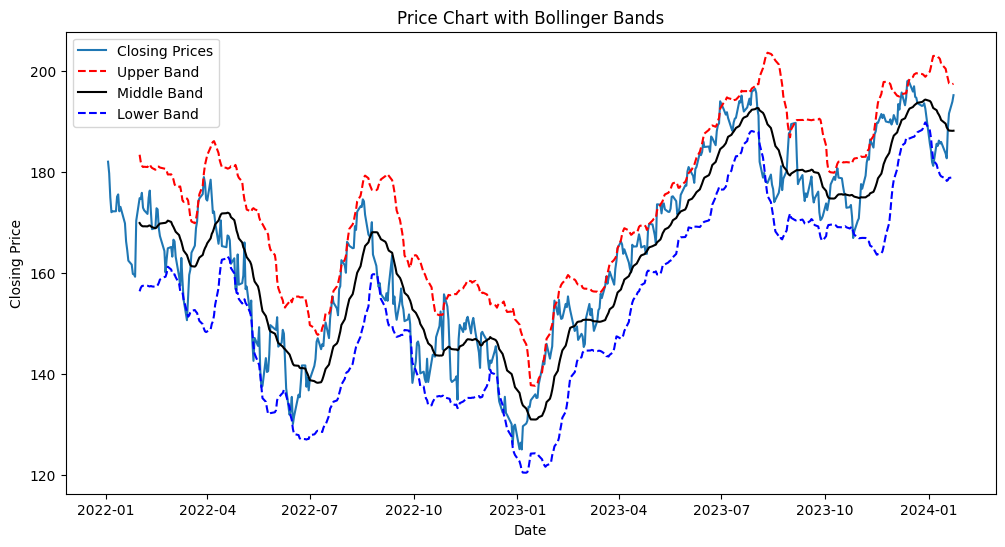

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Prices')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band', linestyle='--', color='red')
plt.plot(stock_data['Date'], stock_data['Middle_Band'], label='Middle Band', linestyle='-', color='black')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band', linestyle='--', color='blue')

plt.title('Price Chart with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Stock Price Prediction using Machine Learning Models

For stock price prediction, regression models are commonly used.

Here are a few models we can start with:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Support Vector Regressor (SVR)
* Gradient Boosting Regressor

**Step 1:  Import Libraries and Split the Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create 'Previous_Close' column
stock_data['Previous_Close'] = stock_data['Close'].shift(1)

# Create 'Daily_Return_Previous' column
stock_data['Daily_Return_Previous'] = stock_data['Daily_Return'].shift(1)

# Create 'Previous_7_Day_MA' column
stock_data['Previous_7_Day_MA'] = stock_data['7_Day_MA'].shift(1)

In [ ]:
stock_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,7_Day_MA,RSI,Close_MA_7,RSI_MA_7,Close_MA_14,RSI_MA_14,Middle_Band,Upper_Band,Lower_Band,Previous_Close,Daily_Return_Previous,Previous_7_Day_MA
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400,-0.012692,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.009995,NaN,NaN
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,-0.026600,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.699997,-0.012692,NaN
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000,-0.016693,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.919998,-0.026600,NaN
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,0.000988,NaN,1.669924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.000000,-0.016693,NaN
5,2022-01-10,169.080002,172.500000,168.169998,172.190002,170.244827,106765600,0.000116,NaN,1.862770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.169998,0.000988,NaN
6,2022-01-11,172.320007,175.179993,170.820007,175.080002,173.102203,76138300,0.016784,175.438570,23.529432,175.438570,NaN,NaN,NaN,NaN,NaN,NaN,172.190002,0.000116,NaN
7,2022-01-12,176.119995,177.179993,174.820007,175.529999,173.547104,74805200,0.002570,174.512857,26.070905,174.512857,7.590433,NaN,NaN,NaN,NaN,NaN,175.080002,0.016784,175.438570
8,2022-01-13,175.779999,176.619995,171.789993,172.190002,170.244827,84505800,-0.019028,173.440000,20.912328,173.440000,10.577908,NaN,NaN,NaN,NaN,NaN,175.529999,0.002570,174.512857
9,2022-01-14,171.339996,173.779999,171.089996,173.070007,171.114883,80440800,0.005111,173.175716,24.831109,173.175716,14.125210,NaN,NaN,NaN,NaN,NaN,172.190002,-0.019028,173.440000


In [ ]:
# Choose the features you want to use for prediction
features = ['Previous_Close', 'Open','Volume', 'Daily_Return_Previous', 'Previous_7_Day_MA']

# Select features and target variable
X = stock_data[features]
y = stock_data['Close']

In [ ]:
# Remove rows with NaN values
X = X.dropna()
y = y[X.index]

In [ ]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Train and Evaluate Each Model**

In [ ]:
# Function for cross-validation and average performance metrics
def cross_validate_model(model, X, y, folds=5):
    mse_scores = -cross_val_score(model, X, y, cv=folds, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=folds, scoring='r2')

    return np.mean(mse_scores), np.mean(r2_scores)

In [ ]:
# Create instances of different regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train and evaluate each model
models = {
    'Linear Regression': linear_reg_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'SVR': svr_model,
    'Gradient Boosting': gradient_boosting_model
}

# Cross-validate each model and print the results
for model_name, model in models.items():
    mse_mean, r2_mean = cross_validate_model(model, X, y)
    print(f"{model_name} - Mean Cross-Validated MSE: {mse_mean}, Mean Cross-Validated R-squared: {r2_mean}")

Linear Regression - Mean Cross-Validated MSE: 5.7455765759043995, Mean Cross-Validated R-squared: 0.9420908296053925
Decision Tree - Mean Cross-Validated MSE: 11.643001410600537, Mean Cross-Validated R-squared: 0.8812415363470331
Random Forest - Mean Cross-Validated MSE: 7.167639819318772, Mean Cross-Validated R-squared: 0.9270036635068613
SVR - Mean Cross-Validated MSE: 387.406682133615, Mean Cross-Validated R-squared: -3.3705059006488582
Gradient Boosting - Mean Cross-Validated MSE: 7.005870728282487, Mean Cross-Validated R-squared: 0.927977648824708


The cross-validated results provide a more robust estimate of model performance, taking into account different subsets of the data.

# Observations and Interpretation

* Linear Regression is performing well on the training data.
* Decision tree is performing well
* Random forest model also shows good performance, maintaining a high R-squared.
* SVR performance is not as good as the ensemble models, and the R-squared is lower.
* Gradient boosting peforms expectionally well, with high R-squared and low MSE

# Conclusion

* Ensemble models (Random Forest, Gradient Boosting) are performing well: The Random Forest model provides a good balance between complexity and performance.
* Linear Regression needs to be checked for overfitting: While Linear Regression shows high R-squared values, it's crucial to consider the potential of overfitting. Let's test it on the test data and then further investigation or regularization techniques might be needed.
* SVR may need further tuning: SVR's performance is not good. Hyperparameter tuning or feature engineering might help improve its performance.



Let's test linear regression on the test data

In [ ]:
# Test Linear Regression on the test set
linear_reg_model.fit(X_train, y_train)
predictions_linear_reg = linear_reg_model.predict(X_test)

# Evaluate Linear Regression on the test set
mse_linear_reg = mean_squared_error(y_test, predictions_linear_reg)
r2_linear_reg = r2_score(y_test, predictions_linear_reg)

print("Linear Regression Performance on Test Set:")
print(f"Mean Squared Error: {mse_linear_reg}")
print(f"R-squared: {r2_linear_reg}")

Linear Regression Performance on Test Set:
Mean Squared Error: 6.748492090100349
R-squared: 0.9764824380474316


# Hyperparameter tuning

Let's focus on tuning the hyperparameters for the Random Forest and Gradient Boosting models.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
# Creating GridSearchCV instances for Random Forest and Gradient Boosting
rf_grid_search = GridSearchCV(random_forest_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search = GridSearchCV(gradient_boosting_model, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit the GridSearchCV instances to the data
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters for each model
print("Random Forest - Best Hyperparameters:")
print(rf_grid_search.best_params_)
print("\nGradient Boosting - Best Hyperparameters:")
print(gb_grid_search.best_params_)

Random Forest - Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Gradient Boosting - Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}


Now, let's use these best hyperparameters to create the final models, evaluate their performance on the test set and proceed further.

In [ ]:
# Final Random Forest model with best hyperparameters
final_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

In [ ]:
# Final Gradient Boosting model with best hyperparameters
final_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=50,
    subsample=0.8,
    random_state=42
)

In [ ]:
# Train the final models on the entire training set
final_rf_model.fit(X_train, y_train)
final_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=2, n_estimators=50, random_state=42,
                          subsample=0.8)

In [ ]:
# Make predictions on the test set
rf_predictions = final_rf_model.predict(X_test)
gb_predictions = final_gb_model.predict(X_test)

In [ ]:
# Evaluate the performance on the test set
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Random Forest - Test Set Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}\n")

print("Gradient Boosting - Test Set Performance:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")

Random Forest - Test Set Performance:
Mean Squared Error: 8.36893647895367
R-squared: 0.9708354133792909

Gradient Boosting - Test Set Performance:
Mean Squared Error: 8.312267941429536
R-squared: 0.971032895398117


# Model Selection

Fantastic results! It seems that all three models—Linear Regression, Random Forest, and Gradient Boosting—perform very well on the test set. Based on these results, we should consider deploying the Linear Regression model for predicting stock prices, as it demonstrates high accuracy on the test set.

# Feature Importance
Let's understand the feature importance for both random forest and gradient boosting models

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Extract feature importance for Random Forest
rf_feature_importance = final_rf_model.feature_importances_

In [ ]:
# Extract feature importance for Gradient Boosting
gb_feature_importance = final_gb_model.feature_importances_

In [ ]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_feature_importance,
    'Gradient Boosting Importance': gb_feature_importance
})

In [ ]:
# Sort the DataFrame by importance for better visualization
feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)

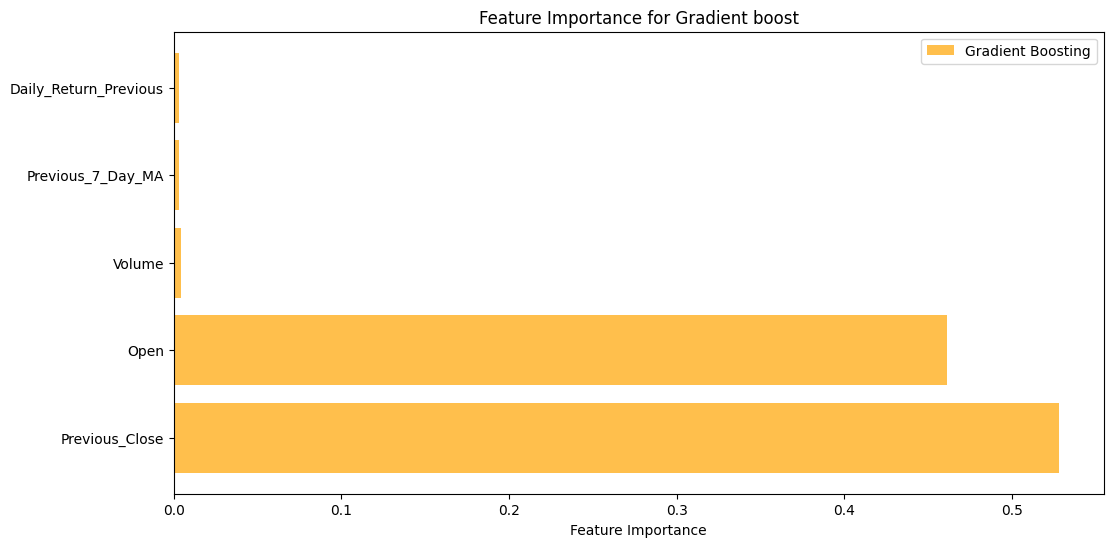

In [ ]:
# Plot feature importance for gradient boost
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gradient Boosting Importance'], color='orange', alpha=0.7, label='Gradient Boosting')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Gradient boost')
plt.legend()
plt.show()

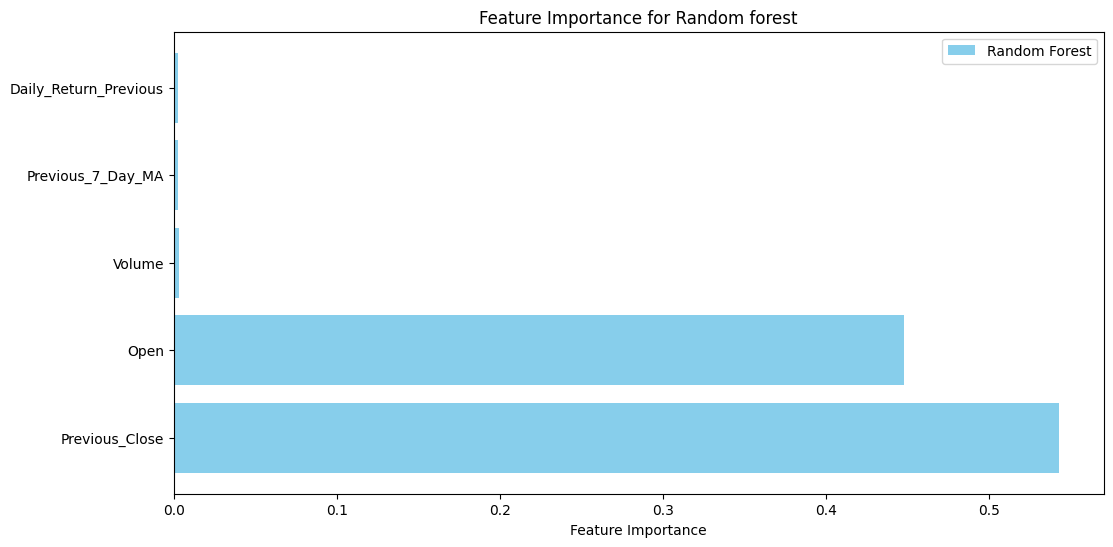

In [ ]:
# Plot feature importance for random forest
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Random Forest Importance'], color='skyblue', label='Random Forest')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random forest')
plt.legend()
plt.show()

From both the graphs, above we can clearly see that the opening price of stock, previous close price have significant impact on predicting the closing price of a stock. While volume of stocks traded, Previous_7_Day_MA and Daily_Return_Previous seems to have little effect and can be removed from our model in future.

# Visualizing Predictions

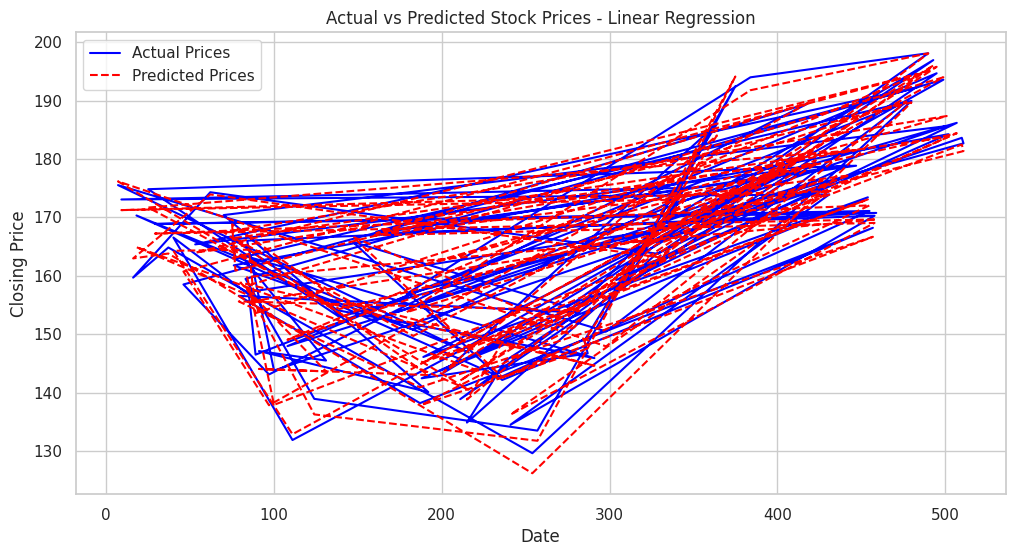

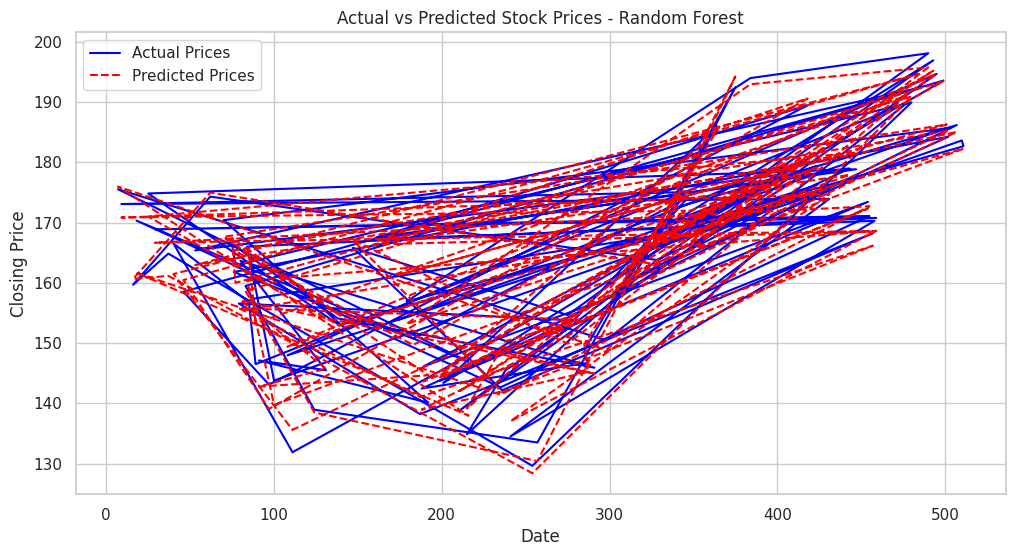

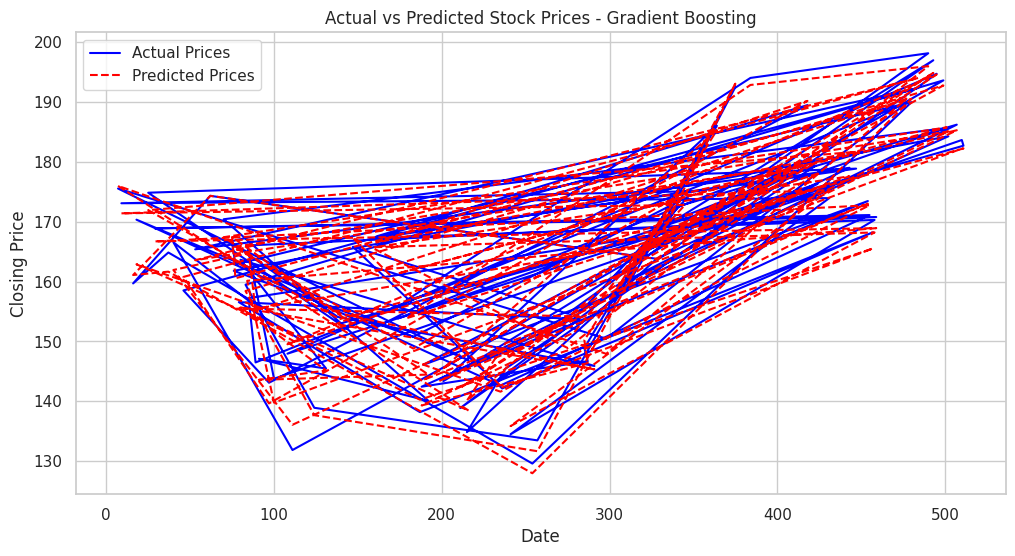

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style='whitegrid')

# Function to plot actual vs predicted prices
def plot_predictions(actual, predictions, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual Prices', color='blue')
    plt.plot(actual.index, predictions, label='Predicted Prices', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Stock Prices - {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

# Plot Linear Regression predictions
plot_predictions(y_test, predictions_linear_reg, 'Linear Regression')

# Plot Random Forest predictions
plot_predictions(y_test, rf_predictions, 'Random Forest')

# Plot Gradient Boosting predictions
plot_predictions(y_test, gb_predictions, 'Gradient Boosting')


# Stock Close Price Prediction for Today and Next Day

Predicting stock closing prices accurately for the next day is a challenging task due to the inherent complexity and randomness in financial markets. Stock prices are influenced by a myriad of factors, including market sentiment, economic indicators, geopolitical events, and more. Even with sophisticated machine learning models, predicting short-term stock movements remains highly uncertain.

While our models have demonstrated excellent performance on historical data, it's important to note the following considerations:

* Market Dynamics: Financial markets are dynamic and can be influenced by unexpected events, making it difficult to predict short-term movements accurately.

* Assumptions: The models are built on the assumption that future market conditions will resemble past conditions. However, if there are significant shifts in market dynamics, the models may not perform as well.

* Limitations: No model can predict unforeseen events or sudden market reactions. External factors such as breaking news, regulatory changes, or global events can have a significant impact on stock prices.

* Overfitting: Models that perform exceptionally well on training and testing data might be overfitting to historical patterns, which may not necessarily repeat in the future.

* Evaluation: It's crucial to evaluate the models on an out-of-sample dataset (not used during training or hyperparameter tuning) to assess their generalization to new, unseen data.

Considering these factors, while our models can provide insights and make predictions based on historical patterns, they should be used with caution for real-time trading decisions. It's advisable to conduct thorough backtesting, consider risk management strategies, and, if possible, consult with financial experts before making any investment decisions.

Additionally, financial markets are unpredictable, and there is no guaranteed way to consistently predict short-term price movements. Many professional traders and investors use a combination of quantitative models, fundamental analysis, and market expertise to inform their decisions.

To predict the closing price for today, we can use the trained models (Random Forest and Gradient Boosting and Linear Regreesion) to make predictions on the most recent data and the final prediction can be average of all the predictions.

In [ ]:
today_data = stock_data.tail(1).copy()

In [ ]:
today_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,7_Day_MA,RSI,Close_MA_7,RSI_MA_7,Close_MA_14,RSI_MA_14,Middle_Band,Upper_Band,Lower_Band,Previous_Close,Daily_Return_Previous,Previous_7_Day_MA
515,2024-01-23,195.020004,195.75,193.830002,195.179993,195.179993,42355600,0.006653,188.784284,67.679733,188.784284,41.924151,186.522142,31.445829,188.142999,197.457663,178.828335,193.889999,0.012163,187.414285


In [ ]:
# Enter the current open price for today (24th Jan 2024)
today_data['Open'] = 195.42

# Enter the current volume for today (24th Jan 2024)
today_data['Volume'] = 53631300

# Enter the previous day's closing price (Close) (23rd Jan 2024)
today_data['Previous_Close'] = 195.179993

# Enter the previous day's daily return (Daily_Return) (23rd Jan 2024)
today_data['Daily_Return_Previous'] = 0.006653

# Enter the previous day's 7 Day moving average (7_Day_MA) (23rd Jan 2024)
today_data['Previous_7_Day_MA'] = 188.784284

In [ ]:
# chosing our features which were used in training
today_features = today_data.drop(['Close', 'Date','High', 'Low', 'Adj Close','Daily_Return', '7_Day_MA', 'RSI','Close_MA_7','RSI_MA_7','Close_MA_14','RSI_MA_14','Middle_Band','Upper_Band','Lower_Band'], axis=1)

In [ ]:
# Define the order of columns used during training
training_feature_order = ['Previous_Close', 'Open', 'Volume', 'Daily_Return_Previous', 'Previous_7_Day_MA']

# Rearrange columns in 'today_features' to match the training order
today_features = today_features[training_feature_order]

In [ ]:
today_features.head()

,Previous_Close,Open,Volume,Daily_Return_Previous,Previous_7_Day_MA
515,195.179993,195.42,53631300,0.006653,188.784284


In [ ]:
# Linear Regression prediction
prediction_linear_reg = linear_reg_model.predict(today_features)

# Random Forest prediction
prediction_rf = final_rf_model.predict(today_features)

# Gradient Boosting prediction
prediction_gb = final_gb_model.predict(today_features)

# Calculate the average of predictions
average_prediction = (prediction_linear_reg + prediction_rf + prediction_gb) / 3

print("Predicted Closing Price for Today:")
print(f"Linear Regression Prediction: {prediction_linear_reg[0]}")
print(f"Random Forest Prediction: {prediction_rf[0]}")
print(f"Gradient Boosting Prediction: {prediction_gb[0]}")
print(f"Average Prediction: {average_prediction[0]}")


Predicted Closing Price for Today:
Linear Regression Prediction: 195.55734486794444
Random Forest Prediction: 194.97978661818954
Gradient Boosting Prediction: 194.24669129927003
Average Prediction: 194.92794092846802


Our prediction for close price on 24th was 194.92 whereas the actual close price was 194.50. It shows that our model is providing reasonable accurate predictions.

# Save the trained models

In [ ]:
import joblib

# Save the trained models
joblib.dump(linear_reg_model, 'linear_regression_model.joblib')
joblib.dump(final_rf_model, 'random_forest_model.joblib')
joblib.dump(final_gb_model, 'gradient_boosting_model.joblib')


['gradient_boosting_model.joblib']